In [26]:
cat = !pwd

plot_directory = cat[0] +"/forest/"

In [27]:
from hiive.mdptoolbox.example import forest, openai
import pandas as pd
from gym import wrappers
import time
import sys
import matplotlib.pyplot as plt
import numpy as np
import gym
from hiive.mdptoolbox.mdp import PolicyIteration, ValueIteration, QLearning, PolicyIterationModified

# helpers 

In [240]:
def get_plot_data_vi( gamma_range , num_states_,P_,R_):
    iters = []
    times = []
    reward = [] 
    avg_error = []
    gamma = []
    states = np.array(range(num_states_))
    save_forest_list = []
    didnt_get_there_list = []
    sell_list =[]
    avg_steps = []
    avg_cum_utility =[]
    max_cum_utility = []
    mean_reward = []
    util_ratio=[]
    for i,v in enumerate(gamma_range):
        vi_temp= ValueIteration(P,R,v, epsilon= .01)
        vi_temp.run()
        iters.append(vi_temp.iter)
        times.append(vi_temp.time)
        reward.append(np.amax(vi_temp.V))
        avg_error.append(np.amin(np.array(vi_temp.error_mean)))
        gamma.append(v)
        #utility, save_forest , sell_forest , didnt_get_there = get_score(vi_temp,P,R,num_states_,1000)
        reward_list, save_forest , sell_forest , didnt_get_there = get_score(vi_temp,P_,R_,states,100)
        #misses, episodes, steps_list, reward_list = get_score(env, vi_temp.policy,vi_temp.V ,episodes=1000)
        save_forest_list.append(np.mean(save_forest) )
        didnt_get_there_list.append(np.mean(didnt_get_there))
        sell_list.append(np.mean(sell_forest))
        avg_cum_utility.append(np.mean(reward_list))
        max_cum_utility.append(np.amax(reward_list))
        mean_reward.append(np.mean(vi_temp.V))
        util_ratio.append(np.mean(reward_list)/np.amax(reward_list))
    columns =["Iterations", "Time", "Max_Reward", "Avg_error", "Gamma",
              "Save_forest", "Did_Not_reach_final_growth", "sell_forest_final",
              "avg_cum_util", "max_average_utility", "Mean_Reward", "Utility_Ratio"]
    columns = [ "VI_{}".format(c) for c in columns]
    data = list(zip(iters,times,
                    reward,avg_error,
                    gamma,
                    save_forest_list,
                    didnt_get_there_list,
                    sell_list,
                    avg_cum_utility,
                    max_cum_utility,
                    mean_reward,
                    util_ratio))
    return pd.DataFrame(data,columns=columns)



def get_plot_data_pi( gamma_range , num_states_,P_,R_):
    iters = []
    times = []
    reward = [] 
    avg_error = []
    gamma = []
    states = np.array(range(num_states_))
    save_forest_list = []
    didnt_get_there_list = []
    sell_list =[]
    avg_steps = []
    avg_cum_utility =[]
    max_cum_utility = []
    mean_reward = []
    util_ratio=[]
    for i,v in enumerate(gamma_range):
        vi_temp= PolicyIteration(P,R,v, max_iter=8000)
        vi_temp.run()
        iters.append(vi_temp.iter)
        times.append(vi_temp.time)
        reward.append(np.amax(vi_temp.V))
        avg_error.append(np.amin(np.array(vi_temp.error_mean)))
        gamma.append(v)
        #utility, save_forest , sell_forest , didnt_get_there = get_score(vi_temp,P,R,num_states_,1000)
        reward_list, save_forest , sell_forest , didnt_get_there = get_score(vi_temp,P_,R_,states,100)
        #misses, episodes, steps_list, reward_list = get_score(env, vi_temp.policy,vi_temp.V ,episodes=1000)
        save_forest_list.append(np.mean(save_forest) )
        didnt_get_there_list.append(np.mean(didnt_get_there))
        sell_list.append(np.mean(sell_forest))
        avg_cum_utility.append(np.mean(reward_list))
        max_cum_utility.append(np.amax(reward_list))
        mean_reward.append(np.mean(vi_temp.V))
        util_ratio.append(np.mean(reward_list)/np.amax(reward_list))
    columns =["Iterations", "Time", "Max_Reward", "Avg_error", "Gamma",
              "Save_forest", "Did_Not_reach_final_growth", "sell_forest_final",
              "avg_cum_util", "max_average_utility", "Mean_Reward", "Utility_Ratio"]
    columns = [ "PI_{}".format(c) for c in columns]
    data = list(zip(iters,times,
                    reward,avg_error,
                    gamma,
                    save_forest_list,
                    didnt_get_there_list,
                    sell_list,
                    avg_cum_utility,
                    max_cum_utility,
                    mean_reward,
                    util_ratio))
    return pd.DataFrame(data,columns=columns)





# def get_plot_data_pi(env, gamma_range ):
#     iters = []
#     times = []
#     reward = [] 
#     avg_error = []
#     gamma = []
#     goal_out_of_2000_runs = []
#     avg_steps = []
#     avg_cum_utility =[]
#     max_cum_utility = []
#     mean_reward = []
#     util_ratio = []
#     for i,v in enumerate(gamma_range):
#         P, R = create_numeric_transition_and_reward_matrix(env, 4,64)
#         vi_temp= PolicyIteration(P,R,v, max_iter=8000)
#         vi_temp.run()
#         iters.append(vi_temp.iter)
#         times.append(vi_temp.time)
#         reward.append(np.amax(vi_temp.V))
#         avg_error.append(np.amin(np.array(vi_temp.error_mean)))
#         gamma.append(v)
#         misses, episodes, steps_list, reward_list = get_score(env, vi_temp.policy,vi_temp.V ,episodes=300)
#         goal_out_of_2000_runs.append((episodes-misses)/episodes )
#         avg_steps.append(np.mean(steps_list))
#         avg_cum_utility.append(np.mean(reward_list))
#         max_cum_utility.append(np.amax(reward_list))
#         mean_reward.append(np.mean(vi_temp.V))
#         util_ratio.append(np.mean(reward_list)/np.amax(reward_list))
#     columns =["Iterations", "Time", "Max_Reward", "Avg_error", "Gamma",
#               "Success_ratio", 
#               "avg_steps",
#               "avg_cum_util", "max_average_utility", "Mean_Reward","Utility_Ratio"]
#     columns = [ "PI_{}".format(c) for c in columns]
#     data = list(zip(iters,times,
#                     reward,avg_error,
#                     gamma,
#                     goal_out_of_2000_runs,
#                     avg_steps,
#                     avg_cum_utility,
#                     max_cum_utility,
#                      mean_reward,
#                      util_ratio))
#     return pd.DataFrame(data,columns=columns)



def run_episode(algo, R_, P_ ,states_):
    state = 0
    reward = 0 
    years = 0 
    cum_util= 0 
    made_it_to_the_end_good = 0
    sellout = 0
    didnt_make_it_to_max_state = 0 
    utility = algo.V
    policy = algo.policy
    cumulative_utilities = []
    max_years = states_[-1] 
    while years != max_years:

        #DECIDE WHAT TO DO
        action = policy[state]
        #this is where I TRY TO DO IT
        state = np.random.choice(a=states_, p=P_[action,state,:])

        #THIS IS WHAT HAPPENED 
        cum_util +=  utility[state]
        reward += R_[state,action]

        years += 1
    if reward == R[-1,0]:
    #         print("You are a G you made it and saved Birds")
        made_it_to_the_end_good +=1

    elif reward == R[-1,1]:
    #         print("You are NOT a G and sold the lives of innocent animals for cash")
        sellout +=1

    else :
        didnt_make_it_to_max_state +=1 
        
    return made_it_to_the_end_good, didnt_make_it_to_max_state , sellout, cum_util

    
    

def get_score(algo_, P_, R_, states_,  episodes):
    utility = [] 
    save_forest =[]
    sell_forest = []
    didnt_get_there = []
    for i in range(episodes):
        made_it_to_the_end, didnt_make_it_to_max_state , sellout, cum_util=  run_episode(algo_, R_,P_,states_)
        utility.append(cum_util)
        save_forest.append(made_it_to_the_end)
        sell_forest.append(sellout)
        didnt_get_there.append(didnt_make_it_to_max_state)
    print(f"save_forest precentage:{np.mean(save_forest)}")
    print(f"Sell Forest:{np.mean(sell_forest)}")
    print(f"Didnt get to final state {np.mean(didnt_get_there)}")
    print(f"avg_util {np.mean(utility)}")
    return utility, save_forest , sell_forest , didnt_get_there
    

In [224]:
num_states = 2100
P, R = forest(r1=1e100 ,r2=1e-12, p=.001,S=num_states)

In [122]:
states = np.array(range(num_states))

# Probs for state wait

In [214]:
#P[0,state,probs]
P[0,:,:]


array([[0.001, 0.999, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.001, 0.   , 0.999, ..., 0.   , 0.   , 0.   ],
       [0.001, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.001, 0.   , 0.   , ..., 0.   , 0.999, 0.   ],
       [0.001, 0.   , 0.   , ..., 0.   , 0.   , 0.999],
       [0.001, 0.   , 0.   , ..., 0.   , 0.   , 0.999]])

# Probs for state Cut

In [215]:
P[1,:,:]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [242]:
R

array([[0.e+000, 0.e+000],
       [0.e+000, 1.e+000],
       [0.e+000, 1.e+000],
       ...,
       [0.e+000, 1.e+000],
       [0.e+000, 1.e+000],
       [1.e+100, 1.e-012]])

In [217]:
# utility, save_forest , sell_forest , didnt_get_there = get_score(pi,P,R,states,100)

save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 104897.63701539586


In [241]:
problem = "forest"

vi_plot_df = get_plot_data_vi(np.linspace(0.8,1.,30),P.shape[1], P,R )
pi_plot_df = get_plot_data_pi(np.linspace(0.8,.9999999,30),P.shape[1], P,R )
# stack horizontally 

vi_pi_df = pd.concat([vi_plot_df, pi_plot_df], axis=1) 

vi_pi_df.rename(columns={"VI_Gamma":"Gamma"}, inplace = True)

save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 5245.005558025819
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 5432.371853215783
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 5633.552430367986
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 5850.187446818226
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 6084.254741769965
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 6337.696289947493
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 6613.285200826355
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 6913.853056541968
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 7243.076234823034
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 7605.211046780929
save_fores

In [251]:
vi_pi_df

,VI_Iterations,VI_Time,VI_Max_Reward,VI_Avg_error,Gamma,VI_Save_forest,VI_Did_Not_reach_final_growth,VI_sell_forest_final,VI_avg_cum_util,VI_max_average_utility,...,PI_Max_Reward,PI_Avg_error,PI_Gamma,PI_Save_forest,PI_Did_Not_reach_final_growth,PI_sell_forest_final,PI_avg_cum_util,PI_max_average_utility,PI_Mean_Reward,PI_Utility_Ratio
0,1054,2.118134,4.980080e+100,1.006037e+02,0.800000,0.00,1.00,0.0,5.245006e+03,5.245445e+03,...,4.980080e+100,7.770676e+84,0.800000,0.00,1.00,0.0,5.245022e+03,5.245445e+03,1.181009e+98,0.999919
1,1097,2.367374,5.157022e+100,1.240150e+06,0.806897,0.00,1.00,0.0,5.432372e+03,5.432759e+03,...,5.157022e+100,3.885338e+84,0.806897,0.00,1.00,0.0,5.432350e+03,5.432759e+03,1.266423e+98,0.999925
2,1142,2.255490,5.347002e+100,1.071480e+01,0.813793,0.00,1.00,0.0,5.633552e+03,5.633950e+03,...,5.347002e+100,7.770676e+84,0.813793,0.00,1.00,0.0,5.633536e+03,5.633949e+03,1.361449e+98,0.999927
3,1191,2.422623,5.551514e+100,2.738131e+04,0.820690,0.00,1.00,0.0,5.850187e+03,5.850616e+03,...,5.551514e+100,1.942669e+84,0.820690,0.00,1.00,0.0,5.850132e+03,5.850616e+03,1.467586e+98,0.999917
4,1243,2.498286,5.772293e+100,1.079197e+01,0.827586,0.00,1.00,0.0,6.084255e+03,6.084616e+03,...,5.772293e+100,3.885338e+84,0.827586,0.00,1.00,0.0,6.084271e+03,6.084616e+03,1.586636e+98,0.999943
5,1300,2.615992,6.011359e+100,5.853085e+04,0.834483,0.00,1.00,0.0,6.337696e+03,6.338116e+03,...,6.011359e+100,9.713344e+83,0.834483,0.00,1.00,0.0,6.337745e+03,6.338116e+03,1.720783e+98,0.999941
6,1362,2.829240,6.271084e+100,6.121730e+01,0.841379,0.00,1.00,0.0,6.613285e+03,6.613660e+03,...,6.271083e+100,3.885338e+84,0.841379,0.00,1.00,0.0,6.613290e+03,6.613659e+03,1.872690e+98,0.999944
7,1430,2.868281,6.554265e+100,1.092578e+00,0.848276,0.00,1.00,0.0,6.913853e+03,6.914254e+03,...,6.554264e+100,3.885338e+84,0.848276,0.00,1.00,0.0,6.913863e+03,6.914253e+03,2.045637e+98,0.999944
8,1503,2.956837,6.864230e+100,1.595052e-02,0.855172,0.00,1.00,0.0,7.243076e+03,7.243475e+03,...,6.864229e+100,7.770676e+84,0.855172,0.00,1.00,0.0,7.243026e+03,7.243474e+03,2.243697e+98,0.999938
9,1585,3.107637,7.204969e+100,4.843069e+02,0.862069,0.00,1.00,0.0,7.605211e+03,7.605619e+03,...,7.204967e+100,7.770676e+84,0.862069,0.00,1.00,0.0,7.605188e+03,7.605618e+03,2.471979e+98,0.999943


In [248]:
## plots
problem

'forest'

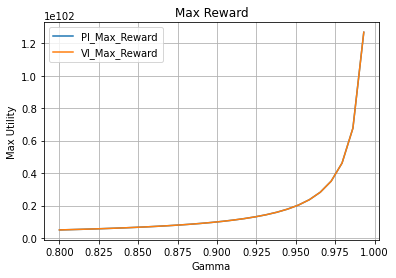

In [262]:

ax = vi_pi_df.iloc[:-1,:].plot(x="Gamma",
                   y=["PI_Max_Reward","VI_Max_Reward" ], title="Max Reward")
plt.grid()
ax.set_ylabel("Max Utility")

plt.savefig(f"{problem}_pi_vi_max_reward.png");

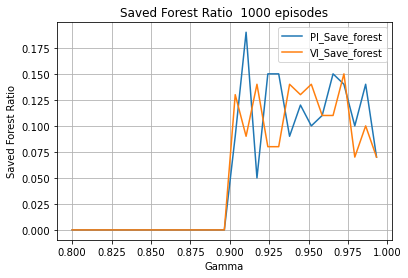

In [261]:
#

ax = vi_pi_df.iloc[:-1,:].plot(x="Gamma",
                   y=[ "PI_Save_forest","VI_Save_forest" ], title="Saved Forest Ratio  1000 episodes") 
plt.grid()
ax.set_ylabel("Saved Forest Ratio")

plt.savefig(f"{problem}_pi_vi_save_forest_ratio.png")


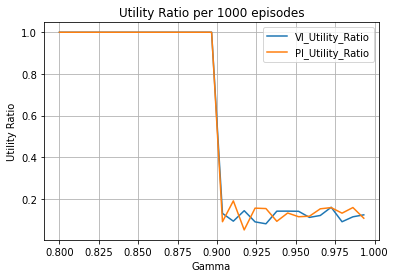

In [260]:
ax = vi_pi_df.iloc[:-1,:].plot(x="Gamma",
                   y=[ 'VI_Utility_Ratio','PI_Utility_Ratio' ], title="Utility Ratio per 1000 episodes") 
plt.grid()
ax.set_ylabel("Utility Ratio")
plt.savefig(f"{problem}_pi_vi_utility_ratio.png")

In [257]:
vi_pi_df.iloc[:-1,:]

,VI_Iterations,VI_Time,VI_Max_Reward,VI_Avg_error,Gamma,VI_Save_forest,VI_Did_Not_reach_final_growth,VI_sell_forest_final,VI_avg_cum_util,VI_max_average_utility,...,PI_Max_Reward,PI_Avg_error,PI_Gamma,PI_Save_forest,PI_Did_Not_reach_final_growth,PI_sell_forest_final,PI_avg_cum_util,PI_max_average_utility,PI_Mean_Reward,PI_Utility_Ratio
0,1054,2.118134,4.980080e+100,1.006037e+02,0.800000,0.00,1.00,0.0,5.245006e+03,5.245445e+03,...,4.980080e+100,7.770676e+84,0.800000,0.00,1.00,0.0,5.245022e+03,5.245445e+03,1.181009e+98,0.999919
1,1097,2.367374,5.157022e+100,1.240150e+06,0.806897,0.00,1.00,0.0,5.432372e+03,5.432759e+03,...,5.157022e+100,3.885338e+84,0.806897,0.00,1.00,0.0,5.432350e+03,5.432759e+03,1.266423e+98,0.999925
2,1142,2.255490,5.347002e+100,1.071480e+01,0.813793,0.00,1.00,0.0,5.633552e+03,5.633950e+03,...,5.347002e+100,7.770676e+84,0.813793,0.00,1.00,0.0,5.633536e+03,5.633949e+03,1.361449e+98,0.999927
3,1191,2.422623,5.551514e+100,2.738131e+04,0.820690,0.00,1.00,0.0,5.850187e+03,5.850616e+03,...,5.551514e+100,1.942669e+84,0.820690,0.00,1.00,0.0,5.850132e+03,5.850616e+03,1.467586e+98,0.999917
4,1243,2.498286,5.772293e+100,1.079197e+01,0.827586,0.00,1.00,0.0,6.084255e+03,6.084616e+03,...,5.772293e+100,3.885338e+84,0.827586,0.00,1.00,0.0,6.084271e+03,6.084616e+03,1.586636e+98,0.999943
5,1300,2.615992,6.011359e+100,5.853085e+04,0.834483,0.00,1.00,0.0,6.337696e+03,6.338116e+03,...,6.011359e+100,9.713344e+83,0.834483,0.00,1.00,0.0,6.337745e+03,6.338116e+03,1.720783e+98,0.999941
6,1362,2.829240,6.271084e+100,6.121730e+01,0.841379,0.00,1.00,0.0,6.613285e+03,6.613660e+03,...,6.271083e+100,3.885338e+84,0.841379,0.00,1.00,0.0,6.613290e+03,6.613659e+03,1.872690e+98,0.999944
7,1430,2.868281,6.554265e+100,1.092578e+00,0.848276,0.00,1.00,0.0,6.913853e+03,6.914254e+03,...,6.554264e+100,3.885338e+84,0.848276,0.00,1.00,0.0,6.913863e+03,6.914253e+03,2.045637e+98,0.999944
8,1503,2.956837,6.864230e+100,1.595052e-02,0.855172,0.00,1.00,0.0,7.243076e+03,7.243475e+03,...,6.864229e+100,7.770676e+84,0.855172,0.00,1.00,0.0,7.243026e+03,7.243474e+03,2.243697e+98,0.999938
9,1585,3.107637,7.204969e+100,4.843069e+02,0.862069,0.00,1.00,0.0,7.605211e+03,7.605619e+03,...,7.204967e+100,7.770676e+84,0.862069,0.00,1.00,0.0,7.605188e+03,7.605618e+03,2.471979e+98,0.999943


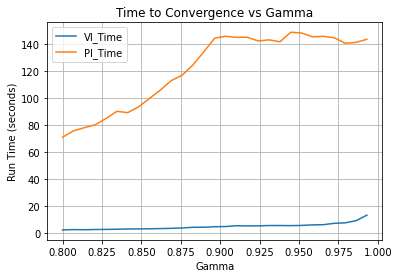

In [263]:
ax = vi_pi_df.iloc[:-1,:].plot(x="Gamma",
                   y=[ 'VI_Time','PI_Time' ], title="Time to Convergence vs Gamma") 
plt.grid()
ax.set_ylabel("Run Time (seconds)")
plt.savefig(f"{problem}_pi_vi_time_to_convergevs_gamma.png")

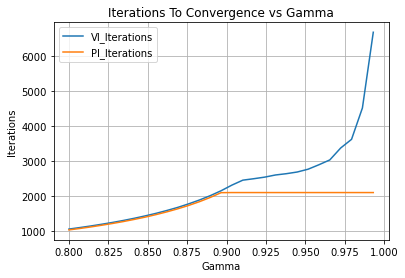

In [264]:
ax = vi_pi_df.iloc[:-1,:].plot(x="Gamma",
                   y=[ 'VI_Iterations','PI_Iterations' ], title="Iterations To Convergence vs Gamma") 
plt.grid()
ax.set_ylabel("Iterations")
plt.savefig(f"{problem}_pi_vi_iterations_to_conv_gamma.png")

## Final Runs ? 

In [265]:
#reward time vs iter 
pi = PolicyIteration(P,R,.9125,run_stat_frequency=True, max_iter=10000)
pi_dict = pi.run()
pi_df = pd.DataFrame(pi_dict)
vi = ValueIteration(P,R,.9125,run_stat_frequency=True)
vi_dict = vi.run()
vi_df = pd.DataFrame(vi_dict)

In [307]:
vi_df

,State,Action,Reward,Error,Time,Max V,Mean V,Iteration
0,None,None,1.000000e+100,1.000000e+100,0.002102,1.000000e+100,4.761905e+96,1
1,None,None,1.911588e+100,9.115875e+99,0.004304,1.911588e+100,1.344369e+97,2
2,None,None,2.742579e+100,8.309918e+99,0.006446,2.742579e+100,2.531500e+97,3
3,None,None,3.500101e+100,7.575217e+99,0.008588,3.500101e+100,3.974399e+97,4
4,None,None,4.190648e+100,6.905473e+99,0.010653,4.190648e+100,5.618559e+97,5
...,...,...,...,...,...,...,...,...
2471,None,None,1.131062e+101,1.440000e+02,4.891881,1.131062e+101,6.091908e+98,2472
2472,None,None,1.131062e+101,1.360000e+02,4.893888,1.131062e+101,6.091908e+98,2473
2473,None,None,1.131062e+101,1.200000e+02,4.895853,1.131062e+101,6.091908e+98,2474
2474,None,None,1.131062e+101,1.040000e+02,4.897821,1.131062e+101,6.091908e+98,2475


In [297]:
np.log(vi_df.Error)


/home/flufylobster/miniconda3/envs/RL37/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       230.258509
1       230.165942
2       230.073374
3       229.980806
4       229.888239
           ...    
2471      4.969813
2472      4.912655
2473      4.787492
2474      4.644391
2475          -inf
Name: Error, Length: 2476, dtype: float64

/home/flufylobster/miniconda3/envs/RL37/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


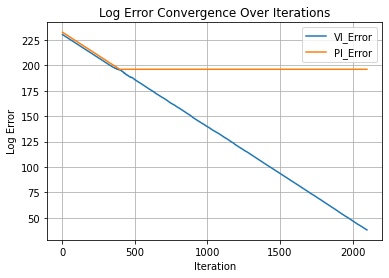

In [301]:
pi_df['VI_Error'] = np.log(vi_df.Error)
pi_df['PI_Error'] = np.log(pi_df.Error)
ax = pi_df.plot(x="Iteration", y=["VI_Error", "PI_Error"], title= "Log Error Convergence Over Iterations")

plt.grid()

ax.set_ylabel("Log Error")
plt.savefig(f"{problem}_pi_vi_log_convergence_over_iter.png")

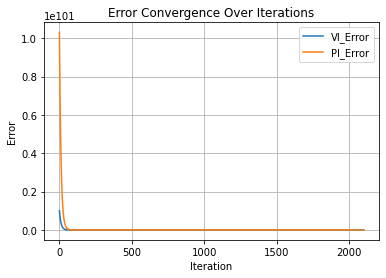

In [407]:
pi_df['VI_Error'] = vi_df.Error
pi_df['PI_Error'] = pi_df.Error
ax = pi_df.plot(x="Iteration", y=["VI_Error", "PI_Error"], title= "Error Convergence Over Iterations")

plt.grid()
ax.set_ylabel("Error")
plt.savefig(f"{problem}_pi_vi_convergence_over_iter.png")

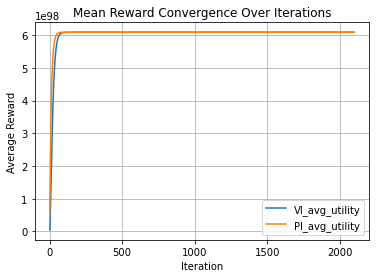

In [408]:
pi_df['VI_avg_utility'] = vi_df['Mean V']
pi_df['PI_avg_utility'] = pi_df['Mean V']
ax = pi_df.plot(x="Iteration", y=['VI_avg_utility', 'PI_avg_utility'], title= "Mean Reward Convergence Over Iterations")
plt.grid()
ax.set_ylabel("Average Reward")
plt.savefig(f"{problem}_pi_vi_avg_reward_over_iter.png")

In [313]:
pi_df.columns

Index(['State', 'Action', 'Reward', 'Error', 'Time', 'V[0]', 'Max V', 'Mean V',
       'Iteration', 'VI_Error', 'PI_Error', 'VI_avg_utility',
       'PI_avg_utility'],
      dtype='object')

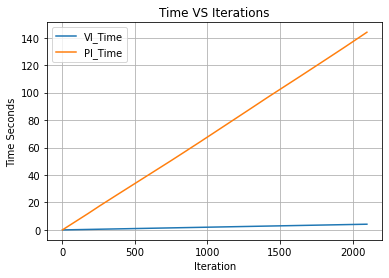

In [317]:
pi_df['VI_Time'] = vi_df.Time
pi_df['PI_Time'] = pi_df.Time
ax = pi_df.plot(x="Iteration", y=['VI_Time', 'PI_Time'], title= "Time VS Iterations")
plt.grid()
ax.set_ylabel("Time Seconds")
plt.savefig(f"{problem}_pi_vi_time_vs_iterations.png")

In [278]:
pi_df['VI_Error'] = vi_df.Error
pi_df['PI_Error'] = pi_df.Error

# Q

In [ ]:
def get_plot_data_vi( gamma_range , num_states_,P_,R_):
    iters = []
    times = []
    reward = [] 
    avg_error = []
    gamma = []
    states = np.array(range(num_states_))
    save_forest_list = []
    didnt_get_there_list = []
    sell_list =[]
    avg_steps = []
    avg_cum_utility =[]
    max_cum_utility = []
    mean_reward = []
    util_ratio=[]
    for i,v in enumerate(gamma_range):
        vi_temp= ValueIteration(P,R,v, epsilon= .01)
        vi_temp.run()
        iters.append(vi_temp.iter)
        times.append(vi_temp.time)
        reward.append(np.amax(vi_temp.V))
        avg_error.append(np.amin(np.array(vi_temp.error_mean)))
        gamma.append(v)
        #utility, save_forest , sell_forest , didnt_get_there = get_score(vi_temp,P,R,num_states_,1000)
        reward_list, save_forest , sell_forest , didnt_get_there = get_score(vi_temp,P_,R_,states,100)
        #misses, episodes, steps_list, reward_list = get_score(env, vi_temp.policy,vi_temp.V ,episodes=1000)
        save_forest_list.append(np.mean(save_forest) )
        didnt_get_there_list.append(np.mean(didnt_get_there))
        sell_list.append(np.mean(sell_forest))
        avg_cum_utility.append(np.mean(reward_list))
        max_cum_utility.append(np.amax(reward_list))
        mean_reward.append(np.mean(vi_temp.V))
        util_ratio.append(np.mean(reward_list)/np.amax(reward_list))
    columns =["Iterations", "Time", "Max_Reward", "Avg_error", "Gamma",
              "Save_forest", "Did_Not_reach_final_growth", "sell_forest_final",
              "avg_cum_util", "max_average_utility", "Mean_Reward", "Utility_Ratio"]
    columns = [ "VI_{}".format(c) for c in columns]
    data = list(zip(iters,times,
                    reward,avg_error,
                    gamma,
                    save_forest_list,
                    didnt_get_there_list,
                    sell_list,
                    avg_cum_utility,
                    max_cum_utility,
                    mean_reward,
                    util_ratio))
    return pd.DataFrame(data,columns=columns)

In [332]:
def get_plot_data_qi_epsilon( gamma_range , num_states_,P_,R_):
    iters = []
    times = []
    reward = [] 
    avg_error = []
    gamma = []
    states = np.array(range(num_states_))
    save_forest_list = []
    didnt_get_there_list = []
    sell_list =[]
    avg_steps = []
    avg_cum_utility =[]
    max_cum_utility = []
    mean_reward = []
    util_ratio=[]
    for i,v in enumerate(gamma_range):
        vi_temp= QLearning(P,R,gamma=0.92, epsilon=v, n_iter=200000)
        vi_temp.run()
        iters.append(i)
        times.append(vi_temp.time)
        reward.append(np.amax(vi_temp.V))
        avg_error.append(np.amin(np.array(vi_temp.error_mean)))
        gamma.append(v)
        #utility, save_forest , sell_forest , didnt_get_there = get_score(vi_temp,P,R,num_states_,1000)
        reward_list, save_forest , sell_forest , didnt_get_there = get_score(vi_temp,P_,R_,states,1000)
        #misses, episodes, steps_list, reward_list = get_score(env, vi_temp.policy,vi_temp.V ,episodes=1000)
        save_forest_list.append(np.mean(save_forest) )
        didnt_get_there_list.append(np.mean(didnt_get_there))
        sell_list.append(np.mean(sell_forest))
        avg_cum_utility.append(np.mean(reward_list))
        max_cum_utility.append(np.amax(reward_list))
        mean_reward.append(np.mean(vi_temp.V))
        util_ratio.append(np.mean(reward_list)/np.amax(reward_list))
    columns =["Iterations", "Time", "Max_Reward", "Avg_error", "Epsilon",
              "Save_forest", "Did_Not_reach_final_growth", "sell_forest_final",
              "avg_cum_util", "max_average_utility", "Mean_Reward", "Utility_Ratio"]
    columns = [ "Q_{}".format(c) for c in columns]
    data = list(zip(iters,times,
                    reward,avg_error,
                    gamma,
                    save_forest_list,
                    didnt_get_there_list,
                    sell_list,
                    avg_cum_utility,
                    max_cum_utility,
                    mean_reward,
                    util_ratio))
    return pd.DataFrame(data,columns=columns)


def get_plot_data_qi_epsilon_decay( gamma_range , num_states_,P_,R_):
    iters = []
    times = []
    reward = [] 
    avg_error = []
    gamma = []
    states = np.array(range(num_states_))
    save_forest_list = []
    didnt_get_there_list = []
    sell_list =[]
    avg_steps = []
    avg_cum_utility =[]
    max_cum_utility = []
    mean_reward = []
    util_ratio=[]
    for i,v in enumerate(gamma_range):
        vi_temp= QLearning(P,R,gamma=0.92, epsilon_decay=v, n_iter=200000)
        vi_temp.run()
        iters.append(i)
        times.append(vi_temp.time)
        reward.append(np.amax(vi_temp.V))
        avg_error.append(np.amin(np.array(vi_temp.error_mean)))
        gamma.append(v)
        #utility, save_forest , sell_forest , didnt_get_there = get_score(vi_temp,P,R,num_states_,1000)
        reward_list, save_forest , sell_forest , didnt_get_there = get_score(vi_temp,P_,R_,states,1000)
        #misses, episodes, steps_list, reward_list = get_score(env, vi_temp.policy,vi_temp.V ,episodes=1000)
        save_forest_list.append(np.mean(save_forest) )
        didnt_get_there_list.append(np.mean(didnt_get_there))
        sell_list.append(np.mean(sell_forest))
        avg_cum_utility.append(np.mean(reward_list))
        max_cum_utility.append(np.amax(reward_list))
        mean_reward.append(np.mean(vi_temp.V))
        util_ratio.append(np.mean(reward_list)/np.amax(reward_list))
    columns =["Iterations", "Time", "Max_Reward", "Avg_error", "Epsilon_decay",
              "Save_forest", "Did_Not_reach_final_growth", "sell_forest_final",
              "avg_cum_util", "max_average_utility", "Mean_Reward", "Utility_Ratio"]
    columns = [ "Q_{}".format(c) for c in columns]
    data = list(zip(iters,times,
                    reward,avg_error,
                    gamma,
                    save_forest_list,
                    didnt_get_there_list,
                    sell_list,
                    avg_cum_utility,
                    max_cum_utility,
                    mean_reward,
                    util_ratio))
    return pd.DataFrame(data,columns=columns)

def get_plot_data_qi_alpha( gamma_range , num_states_,P_,R_):
    iters = []
    times = []
    reward = [] 
    avg_error = []
    gamma = []
    states = np.array(range(num_states_))
    save_forest_list = []
    didnt_get_there_list = []
    sell_list =[]
    avg_steps = []
    avg_cum_utility =[]
    max_cum_utility = []
    mean_reward = []
    util_ratio=[]
    for i,v in enumerate(gamma_range):
        vi_temp= QLearning(P,R,gamma=0.92, alpha=v, n_iter=200000)
        vi_temp.run()
        iters.append(i)
        times.append(vi_temp.time)
        reward.append(np.amax(vi_temp.V))
        avg_error.append(np.amin(np.array(vi_temp.error_mean)))
        gamma.append(v)
        #utility, save_forest , sell_forest , didnt_get_there = get_score(vi_temp,P,R,num_states_,1000)
        reward_list, save_forest , sell_forest , didnt_get_there = get_score(vi_temp,P_,R_,states,1000)
        #misses, episodes, steps_list, reward_list = get_score(env, vi_temp.policy,vi_temp.V ,episodes=1000)
        save_forest_list.append(np.mean(save_forest) )
        didnt_get_there_list.append(np.mean(didnt_get_there))
        sell_list.append(np.mean(sell_forest))
        avg_cum_utility.append(np.mean(reward_list))
        max_cum_utility.append(np.amax(reward_list))
        mean_reward.append(np.mean(vi_temp.V))
        util_ratio.append(np.mean(reward_list)/np.amax(reward_list))
    columns =["Iterations", "Time", "Max_Reward", "Avg_error", "Alpha",
              "Save_forest", "Did_Not_reach_final_growth", "sell_forest_final",
              "avg_cum_util", "max_average_utility", "Mean_Reward", "Utility_Ratio"]
    columns = [ "Q_{}".format(c) for c in columns]
    data = list(zip(iters,times,
                    reward,avg_error,
                    gamma,
                    save_forest_list,
                    didnt_get_there_list,
                    sell_list,
                    avg_cum_utility,
                    max_cum_utility,
                    mean_reward,
                    util_ratio))
    return pd.DataFrame(data,columns=columns)

In [338]:
num_states = 2100
P, R = forest(r1=1e100 ,r2=1e-12, p=.001,S=num_states)
qi_plot_df_alpha = get_plot_data_qi_alpha(np.linspace(0.001,1.,10),2100,P,R)
qi_plot_df_epsilon = get_plot_data_qi_epsilon(np.linspace(0.001,1.,10),2100,P,R)
qi_plot_df_epsilon_decay = get_plot_data_qi_epsilon_decay(np.linspace(0.001,1.,10),2100,P,R)

save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 13100.831230687621
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 13103.725811972809
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 13104.367410336576
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 13106.12409848752
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 13107.895028030533
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 13109.364237277732
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 13107.209720466957
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 13109.823831069914
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 13110.710285578634
save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 13110.500256774938
s

In [340]:
qi_plot_df_alpha

,Q_Iterations,Q_Time,Q_Max_Reward,Q_Avg_error,Q_Alpha,Q_Save_forest,Q_Did_Not_reach_final_growth,Q_sell_forest_final,Q_avg_cum_util,Q_max_average_utility,Q_Mean_Reward,Q_Utility_Ratio
0,0,12.430772,2.140247e+99,0.000116,0.001,0.0,1.0,0.0,13100.831231,13101.233832,1.023226e+96,0.999969
1,1,12.220560,8.471503e+98,0.000094,0.112,0.0,1.0,0.0,13103.725812,13104.105592,4.036673e+95,0.999971
2,2,12.232896,1.382355e+99,0.000088,0.223,0.0,1.0,0.0,13104.367410,13104.751532,6.598644e+95,0.999971
3,3,12.239732,2.121870e+99,0.000075,0.334,0.0,1.0,0.0,13106.124098,13106.513829,1.014726e+96,0.999970
4,4,12.227570,5.985862e+98,0.000035,0.445,0.0,1.0,0.0,13107.895028,13108.287964,2.850410e+95,0.999970
5,5,12.217829,1.000000e+97,0.000079,0.556,0.0,1.0,0.0,13109.364237,13109.755785,4.761905e+93,0.999970
6,6,12.442623,6.505199e+00,0.000008,0.667,0.0,1.0,0.0,13107.209720,13107.597027,1.877368e-02,0.999970
7,7,12.129188,3.395516e+98,0.000034,0.778,0.0,1.0,0.0,13109.823831,13110.198130,1.617744e+95,0.999971
8,8,12.385844,6.284401e+98,0.000013,0.889,0.0,1.0,0.0,13110.710286,13111.111862,2.993710e+95,0.999969
9,9,12.352694,1.124953e+99,0.000067,1.000,0.0,1.0,0.0,13110.500257,13110.872141,5.368496e+95,0.999972


In [350]:
project

NameError: name 'project' is not defined

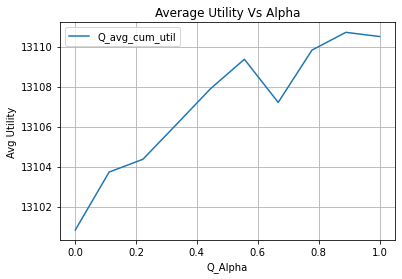

In [415]:
ax = qi_plot_df_alpha.plot(x="Q_Alpha", y="Q_avg_cum_util", title="Average Utility Vs Alpha")
ax.set_ylabel("Avg Utility")
plt.grid()
plt.savefig(f"{problem}_avg_utility_vs_alpha.png");

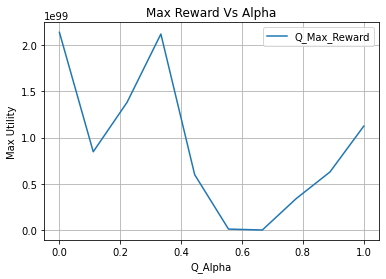

In [409]:
ax = qi_plot_df_alpha.plot(x="Q_Alpha", y="Q_Max_Reward", title="Max Reward Vs Alpha")
ax.set_ylabel("Max Utility")
plt.grid()

plt.savefig(f"{problem}_max_rew_vs_alpha.png");

In [348]:
qi_plot_df_epsilon

,Q_Iterations,Q_Time,Q_Max_Reward,Q_Avg_error,Q_Epsilon,Q_Save_forest,Q_Did_Not_reach_final_growth,Q_sell_forest_final,Q_avg_cum_util,Q_max_average_utility,Q_Mean_Reward,Q_Utility_Ratio
0,0,12.673411,1.972698e+99,0.000100,0.001,0.0,1.0,0.0,13100.936051,13101.301188,9.444906e+95,0.999972
1,1,12.394671,6.980715e+98,0.000040,0.112,0.0,1.0,0.0,13099.863370,13100.248773,3.335158e+95,0.999971
2,2,12.200592,3.440048e+00,0.000084,0.223,0.0,1.0,0.0,6377.677957,6378.655744,9.994954e-03,0.999847
3,3,12.697387,1.005971e+99,0.000042,0.334,0.0,1.0,0.0,8667.398813,8668.075928,4.804264e+95,0.999922
4,4,11.994358,1.898633e+98,0.000019,0.445,0.0,1.0,0.0,13103.752193,13104.131091,9.043736e+94,0.999971
5,5,12.115267,5.288991e+98,0.000100,0.556,0.0,1.0,0.0,13106.069324,13106.462539,2.518961e+95,0.999970
6,6,11.758434,9.960503e+98,0.000091,0.667,0.0,1.0,0.0,13102.124309,13102.518170,4.753848e+95,0.999970
7,7,12.228896,5.587698e+98,0.000127,0.778,0.0,1.0,0.0,13104.029280,13104.418211,2.661421e+95,0.999970
8,8,12.213483,5.189406e+98,0.000103,0.889,0.0,1.0,0.0,13101.465674,13101.854230,2.472153e+95,0.999970
9,9,11.625550,6.503962e+00,0.000077,1.000,0.0,1.0,0.0,13105.072224,13105.467533,1.513535e-02,0.999970


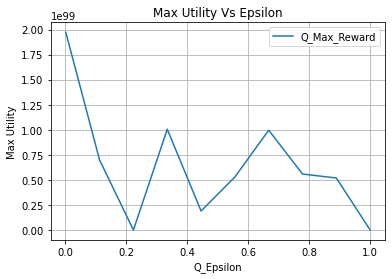

In [410]:
ax = qi_plot_df_epsilon.plot(x="Q_Epsilon", y="Q_Max_Reward", title="Max Utility Vs Epsilon")
ax.set_ylabel("Max Utility")
plt.grid()
plt.savefig(f"{problem}_max_reward_vs_epsilon.png");

In [360]:
qi_plot_df_epsilon_decay

,Q_Iterations,Q_Time,Q_Max_Reward,Q_Avg_error,Q_Epsilon_decay,Q_Save_forest,Q_Did_Not_reach_final_growth,Q_sell_forest_final,Q_avg_cum_util,Q_max_average_utility,Q_Mean_Reward,Q_Utility_Ratio
0,0,12.317483,1.520735e+99,0.000094,0.001,0.0,1.0,0.0,13102.287593,13102.674597,7.255820e+95,0.999970
1,1,12.095910,7.477843e+98,0.000152,0.112,0.0,1.0,0.0,13100.103116,13100.490724,3.563240e+95,0.999970
2,2,12.190422,6.284401e+98,0.000091,0.223,0.0,1.0,0.0,13100.225021,13100.618389,2.994540e+95,0.999970
3,3,12.237300,2.297977e+98,0.000078,0.334,0.0,1.0,0.0,8664.587562,8665.275007,1.094275e+95,0.999921
4,4,12.456831,2.397793e+98,0.000136,0.445,0.0,1.0,0.0,13098.694566,13099.087804,1.141806e+95,0.999970
5,5,11.779217,7.378433e+98,0.000076,0.556,0.0,1.0,0.0,13103.240680,13103.637024,3.521191e+95,0.999970
6,6,11.939374,1.313107e+99,0.000086,0.667,0.0,1.0,0.0,13102.042542,13102.425921,6.265770e+95,0.999971
7,7,12.203030,1.253721e+99,0.000076,0.778,0.0,1.0,0.0,13094.433723,13094.820911,5.983167e+95,0.999970
8,8,12.244746,8.670140e+98,0.000044,0.889,0.0,1.0,0.0,13100.422002,13100.804906,4.129863e+95,0.999971
9,9,10.807451,6.099511e+00,0.000468,1.000,0.0,1.0,0.0,12268.446587,12268.827395,2.298461e-02,0.999969


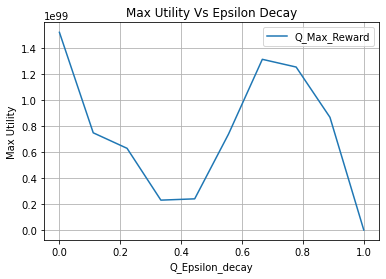

In [411]:
ax = qi_plot_df_epsilon_decay.plot(x="Q_Epsilon_decay", y="Q_Max_Reward", title="Max Utility Vs Epsilon Decay")
ax.set_ylabel("Max Utility")
plt.grid()
plt.savefig(f"{problem}_max_reward_vs_epsilon_decay.png");

In [364]:
q = QLearning(P, R, gamma=0.99 ,alpha = 0.99 , epsilon=0.01, epsilon_decay = 0.01,n_iter=10000000,run_stat_frequency=True)
q_dict = q.run()
q_df = pd.DataFrame(q_dict)
# misses, episodes, steps_list, reward_list =get_score(env, q.policy,q.V, episodes=1000)
utility, save_forest , sell_forest , didnt_get_there = get_score(q,P,R,states,1000)


save_forest precentage:0.0
Sell Forest:0.0
Didnt get to final state 1.0
avg_util 104899.95201908192


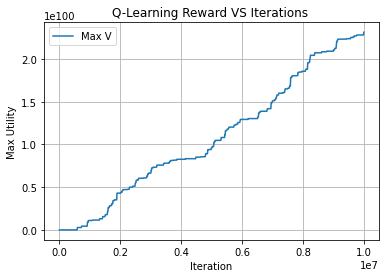

In [412]:
ax = q_df.iloc[::10000,:].plot(x="Iteration", y="Max V", title="Q-Learning Reward VS Iterations ")
ax.plot()
plt.grid()
ax.set_ylabel("Max Utility")
plt.savefig(f"{problem}_q_max_v_vs_itret.png")

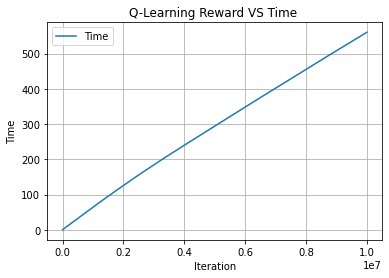

In [416]:
ax = q_df.iloc[::10000,:].plot(x="Iteration", y="Time", title="Q-Learning Reward VS Time ")
ax.plot()
plt.grid()
ax.set_ylabel("Time")
plt.savefig(f"{problem}_q_time_vs_itret.png")

In [400]:

    
q_plot_policy = pd.DataFrame(
    list(zip([i for i in range(len(q.policy))], q.policy)), columns=["State", "Action"])

pi_plot_policy = pd.DataFrame(
    list(zip([i for i in range(len(pi.policy))], pi.policy)), columns=["State", "Action"])

vi_plot_policy = pd.DataFrame(
    list(zip([i for i in range(len(vi.policy))], vi.policy)), columns=["State", "Action"])


### Optimal Policies 

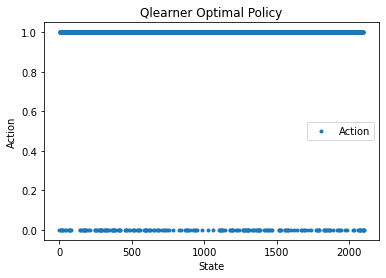

In [397]:
ax=q_plot_policy.plot(x="State", y="Action",  style=".", title="Qlearner Optimal Policy")
ax.set_ylabel("Action")
plt.savefig(f"{problem}_q_optimal_policy.png")


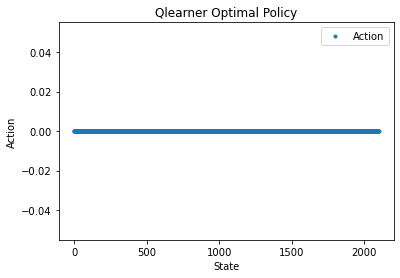

In [401]:
ax=pi_plot_policy.plot(x="State", y="Action",  style=".", title="Qlearner Optimal Policy")
ax.set_ylabel("Action")
plt.savefig(f"{problem}_pi_optimal_policy.png")


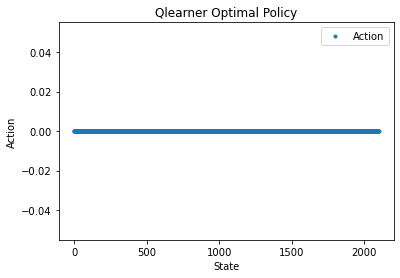

In [402]:
ax=vi_plot_policy.plot(x="State", y="Action",  style=".", title="Qlearner Optimal Policy")
ax.set_ylabel("Action")
plt.savefig(f"{problem}_vi_optimal_policy.png")


In [ ]:
def get_score(algo_, P_, R_, states_,  episodes):
    utility = [] 
    save_forest =[]
    sell_forest = []
    didnt_get_there = []
    for i in range(episodes):
        made_it_to_the_end, didnt_make_it_to_max_state , sellout, cum_util=  run_episode(algo_, R_,P_,states_)
        utility.append(cum_util)
        save_forest.append(made_it_to_the_end)
        sell_forest.append(sellout)
        didnt_get_there.append(didnt_make_it_to_max_state)
    print(f"save_forest precentage:{np.mean(save_forest)}")
    print(f"Sell Forest:{np.mean(sell_forest)}")
    print(f"Didnt get to final state {np.mean(didnt_get_there)}")
    print(f"avg_util {np.mean(utility)}")
    return utility, save_forest , sell_forest , didnt_get_there

In [419]:
get_score(pi,P,R,np.array(range(2100)) ,episodes=1000)

save_forest precentage:0.116
Sell Forest:0.0
Didnt get to final state 0.884
avg_util 1.522507442087306e+101


([2.560329215914933e+90,
  1.4021550003524689e+78,
  6.9999445468695e+65,
  5.1211536653034345e+62,
  4.208959266078461e+77,
  2.740217693076601e+48,
  2.7722100476256533e+49,
  1.4855072144835686e+75,
  2.7426054673596062e+72,
  6.684313730834328e+69,
  2.4131627882604373e+53,
  3.752056963178074e+99,
  7.863761827688119e+83,
  9.677561015755853e+61,
  1.0991623063638948e+65,
  2.773819603390536e+65,
  1.2793007597907136e+102,
  1.850976653644915e+78,
  8.326393101465875e+64,
  4.354310048725875e+56,
  7.348477591296199e+50,
  3.577677730849635e+63,
  2.331255165840066e+58,
  1.8296161068976515e+77,
  2.680448673819062e+78,
  1.1377808886204344e+60,
  1.8069278593874676e+52,
  3.0086036363592155e+72,
  5.0173678645241505e+57,
  1.2938607351192195e+95,
  2.7101684227875083e+63,
  1.850976653644915e+78,
  1.2793007597907136e+102,
  1.062162853940885e+78,
  5.182434738637566e+71,
  1.3855715854994348e+69,
  7.247988539867391e+68,
  7.590235871382616e+64,
  2.5285132950717897e+57,
  5.122

In [420]:
get_score(vi,P,R,np.array(range(2100)) ,episodes=1000)

save_forest precentage:0.129
Sell Forest:0.0
Didnt get to final state 0.871
avg_util 1.6900418110088114e+101


([7.331321448736222e+61,
  4.455355194273872e+50,
  1.2793007597907134e+102,
  9.136600586860002e+72,
  1.2793007597907134e+102,
  8.727160361311359e+84,
  1.2793007597907134e+102,
  2.678892674833571e+62,
  9.679733042512071e+69,
  9.682543806168234e+77,
  1.2793007597907134e+102,
  1.2793007597907134e+102,
  9.745715830508214e+53,
  3.079263884560225e+74,
  6.762352285142175e+70,
  3.8346073745527854e+61,
  1.2793007597907134e+102,
  2.1493303444409258e+51,
  1.205417174483106e+57,
  1.2793007597907134e+102,
  9.679733042512071e+69,
  8.326393102207098e+64,
  4.305310457685552e+63,
  1.488182080382121e+51,
  8.616706098873829e+51,
  2.1269948787226606e+82,
  1.6678551728465384e+77,
  1.612180668275041e+98,
  1.9154536990194036e+65,
  4.0203423713323854e+89,
  1.2793007597907134e+102,
  6.086279553538937e+37,
  4.359369803266739e+88,
  3.454237605364659e+52,
  5.063262363143061e+61,
  1.2793007597907134e+102,
  4.566543259391985e+92,
  1.2793007597907134e+102,
  1.2793007597907134e+10